In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC

In [69]:
df=pd.read_csv('../processed_data/training_data.csv')
df.head(2)

,Unnamed: 0,Australia,Central_Rich_Europe,East_Europe_Balkans,Mediteranian_Europe,North_Europe_Scand,user_id,birth_year,country,city,...,LOST_CARD_ORDER,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,METAL_RESERVE_PLAN,NO_INITIAL_CARD_ORDER,NO_INITIAL_CARD_USE,ONBOARDING_TIPS_ACTIVATED_USERS,PROMO,PROMO_CARD_ORDER,REENGAGEMENT_ACTIVE_FUNDS,WELCOME_BACK
0,0,0,0,0,1,0,user_0,1992,Mediteranian_Europe,Madrid,...,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0
1,1,0,0,1,0,0,user_1,1985,East_Europe_Balkans,Klaipeda,...,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,3.0,0.0


In [70]:
features = ['total_amount', 'number_transactions' ,'transaction_period', 'age', 'user_settings_crypto_unlocked', 
            'brand', 'num_contacts', 'user_active_time' ,'user_trans_time', 'user_trans_periodicity','BLACK_FRIDAY',	
            'BLUE_TUESDAY',	'ENGAGEMENT_SPLIT_BILL_RESTAURANT',	'INVEST_IN_GOLD',	'JOINING_ANNIVERSARY',
            'LOST_CARD_ORDER',	'MADE_MONEY_REQUEST_NOT_SPLIT_BILL',	'METAL_RESERVE_PLAN',	'NO_INITIAL_CARD_ORDER',
            'NO_INITIAL_CARD_USE',	'ONBOARDING_TIPS_ACTIVATED_USERS',	'PROMO',	'PROMO_CARD_ORDER',	'REENGAGEMENT_ACTIVE_FUNDS',
            'WELCOME_BACK','ATM',	'CARD_PAYMENT',	'CARD_REFUND',	'EXCHANGE',	'REFUND',	'TAX',	'TOPUP',	'TRANSFER',
            'CHF',	'EUR',	'GBP',	'OTHER',	'Central_Rich_Europe',  'Australia',	'East_Europe_Balkans',
            'Mediteranian_Europe',	'North_Europe_Scand']

countries = ['Australia',	'Central_Rich_Europe',	'East_Europe_Balkans',	'Mediteranian_Europe',	'North_Europe_Scand']


currency = [	'CHF',	'EUR',	'GBP',	'OTHER']


transactions = ['BLACK_FRIDAY',	'BLUE_TUESDAY',	'ENGAGEMENT_SPLIT_BILL_RESTAURANT',	'INVEST_IN_GOLD',	'JOINING_ANNIVERSARY',
                'LOST_CARD_ORDER',	'MADE_MONEY_REQUEST_NOT_SPLIT_BILL',	'METAL_RESERVE_PLAN',	'NO_INITIAL_CARD_ORDER',
                'NO_INITIAL_CARD_USE',	'ONBOARDING_TIPS_ACTIVATED_USERS',	'PROMO',	'PROMO_CARD_ORDER',	'REENGAGEMENT_ACTIVE_FUNDS',
                'WELCOME_BACK']

notifications = ['ATM',	'CARD_PAYMENT',	'CARD_REFUND',	'EXCHANGE',	'REFUND',	'TAX',	'TOPUP',	'TRANSFER']

user_attributes = ['total_amount', 'number_transactions' ,'transaction_period', 'age', 'user_settings_crypto_unlocked', 
                   'brand', 'num_contacts', 'user_active_time' ,'user_trans_time', 'user_trans_periodicity']

x=df[features].copy()
y=df['plan']

## Split train test set

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,y_train.shape)

(12435, 42) (12435,)


## Class imbalance

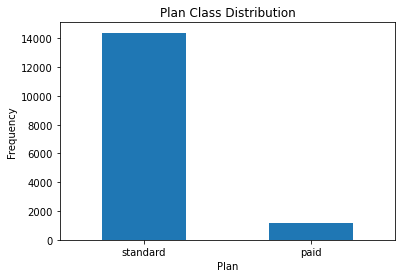

In [72]:
labels=['standard','paid']
count_classes=pd.value_counts(df['plan'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Plan Class Distribution')
plt.xticks(range(2),labels)
plt.xlabel('Plan')
plt.ylabel('Frequency')
plt.show()

In [73]:
Standard=df[df['plan']==0]
Paid=df[df['plan']==1]
print(Standard.shape,Paid.shape)

(14394, 56) (1150, 56)


## Upsampling minor class

In [74]:
os=SMOTE()
X_train,Y_train=os.fit_sample(x_train,y_train)
print('Original dataset shape is : ',x_train.shape, ' and ',y_train.shape)
print('Resampled dataset shape is: ',X_train.shape,' and ',Y_train.shape)

Original dataset shape is :  (12435, 42)  and  (12435,)
Resampled dataset shape is:  (23002, 42)  and  (23002,)


## Scaling the data

In [75]:
ssc=StandardScaler()
ssc.fit_transform(X_train)
ssc.transform(x_test)

array([[-0.24974303, -0.69060092, -0.90692365, ..., -0.45567998,
        -0.46275935,  1.42162369],
       [-0.25312822, -0.71591267, -1.87323396, ..., -0.45567998,
         2.16095041, -0.70342103],
       [-0.25305677, -0.7127487 , -1.87323396, ..., -0.45567998,
        -0.46275935,  1.42162369],
       ...,
       [ 0.13317558, -0.36787618, -0.69755642, ...,  2.19452255,
        -0.46275935, -0.70342103],
       [-0.21919428, -0.60517379, -0.3110323 , ...,  2.19452255,
        -0.46275935, -0.70342103],
       [-0.25109503, -0.70958473, -1.01965986, ..., -0.45567998,
        -0.46275935,  1.42162369]])

## Neural

In [76]:
#  grid={'activation':['logistic'],
#        'learning_rate_init':[0.0001],
#        'solver':['adam'],
#        'batch_size':[88],
#        'learning_rate' : ['adaptive'],
#        'momentum':[0.5]
#         }

# mlp=MLPClassifier()
# gs=GridSearchCV(mlp,grid,cv=3,scoring='accuracy')
# gs_result=gs.fit(X_train,Y_train)
# print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_))
# mlp_pred=gs.predict(x_test)
# print(accuracy_score(y_test,mlp_pred))
# print(classification_report(y_test,mlp_pred))

## Random Forest


In [77]:
# var = VarianceThreshold()
# rf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
# rf.fit(X_train, Y_train)
# rf.feature_importances_

# for c, imp in sorted(zip(features, rf.feature_importances_), key=lambda pair: pair[1], reverse=True):
#   print('{:20}: {}'.format(c, imp))

# rf = RandomForestClassifier()

# pipe1 = Pipeline([('selector', var),
#                   ('model', rf)])

# grid1 = {'selector__threshold': [0],#, 0.01, 0.5
#          'model__n_estimators': [104]}#101,102,103,105

# clf = GridSearchCV(pipe1, grid1)
# clf.fit(X_train, Y_train)

# print(clf.best_params_, '\n')
# print(classification_report(y_test, clf.predict(x_test)))

## Logistic Regression

In [79]:
grid2 = {'penalty' : [ 'none'],  #'l1', 'l2', 'elasticnet', 
         #'C': [0.001],
         'solver' : ['newton-cg']#'lbfgs', 'liblinear', 'sag', 'saga'
         }


log = LogisticRegression()
gs = GridSearchCV( log, grid2, cv=3, scoring='accuracy')
gs.fit(X_train,Y_train)
log_pred = gs.predict(x_test)
print('the best parameters used for this model are: ',gs.best_params_, '\n')
print('the model predicts with an accuracy score of: ',accuracy_score(y_test,log_pred))
print(classification_report(y_test,log_pred))

c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


the best parameters used for this model are:  {'penalty': 'none', 'solver': 'newton-cg'} 

the model predicts with an accuracy score of:  0.959472499195883
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2893
           1       0.68      0.79      0.73       216

    accuracy                           0.96      3109
   macro avg       0.83      0.88      0.85      3109
weighted avg       0.96      0.96      0.96      3109



c:\python\python37\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [80]:
## SVC

In [81]:
# grid3 = {'kernel' : [  'rbf'],
#          'gamma' : ['scale', 'auto'],
#          'decision_function_shape' : ['ovo', 'ovr']
#         }

# svm = SVC(gamma= 'scale', kernel= 'rbf', class_weight= None)
# gs = GridSearchCV( svm, grid3, cv=3, scoring='accuracy')
# gs.fit(X_train,Y_train)
# predictions = gs.predict(x_test)
# print(gs.best_params_, '\n')
# print(accuracy_score(y_test,predictions))
# print(classification_report(y_test,predictions))




# XGB


In [82]:
# import xgboost as xgb
# import random
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import RandomizedSearchCV
# g = xgb.XGBClassifier()
# xg_grid = {'eta': [0.1],
#              'min_depth': [6],
#              'min_child_weight': [3],
#              'scale_pos_weight': [0.5],
#              'objective': ['binary:logistic']
#             }
# gs = GridSearchCV( xg, xg_grid, cv=3, scoring='accuracy')
# gs.fit(X_train,Y_train)
# log_pred = gs.predict(x_test)
# print('the best parameters used for this model are: ',gs.best_params_, '\n')
# print('the model predicts with an accuracy score of: ',accuracy_score(y_test,log_pred))
# print(classification_report(y_test,log_pred))
